In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [171]:
df=pd.read_csv('data/train.csv')
network=pd.read_csv('data/network.csv')

In [6]:
total_station=list(set(list(network.station1.value_counts().index)+list(network.station2.value_counts().index)))
index=[x for x in np.arange(len(total_station))]
dicts=dict(zip(total_station,index))

In [10]:
adj_maxtrix=np.zeros((len(dicts),len(dicts)))
for name,rows in network.iterrows():
    i,j=dicts[rows[1]],dicts[rows[2]]
    adj_maxtrix[i,j]+=1

<AxesSubplot:>

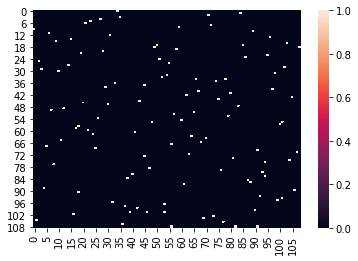

In [13]:
sns.heatmap(adj_maxtrix)

In [166]:
stations_pair={}
for name,rows in network.iterrows():
    if rows['station1']!='vpGT' and rows['station1']!='rKwb':
        if rows['station1'] in stations_pair:
            stations_pair[rows['station1']].append(rows['station2'])
        else:
            stations_pair[rows['station1']]=[rows['station2']]
    if rows['station2']!='vpGT' and rows['station2']!='rKwb':
        if rows['station2'] in stations_pair:
            stations_pair[rows['station2']].append(rows['station1'])
        else:
            stations_pair[rows['station2']]=[rows['station1']]   
#del stations_pair['rKwb'],stations_pair['vpGT']

In [167]:
all_lines=[]
for begin_station,line_name in zip(begin_stations,['A','B','C','D']):
    line=[]
    line_station=lines[line_name].tolist()
    while len(line_station)!=0:
        print(line_station)
        print(begin_station)
        line_station.remove(begin_station)
        line.append(begin_station)
        df=network[(network["station1"]==begin_station)|(network["station2"]==begin_station)]
        a=pd.DataFrame(pd.concat([df["station1"],df["station2"]])).values.tolist()
        a=[x[0] for x in a]
        a.remove(begin_station)
        for x in a:
            if x in line_station:
                begin_station=x
                break
    all_lines.append(line)

{'Femc': ['vpGT', 'dJlm'],
 'dJlm': ['Femc', 'jebQ'],
 'jebQ': ['dJlm', 'PsTo'],
 'PsTo': ['jebQ', 'mxQg'],
 'mxQg': ['PsTo', 'CTnl'],
 'CTnl': ['mxQg', 'AFTQ'],
 'AFTQ': ['CTnl', 'aCxM'],
 'aCxM': ['AFTQ', 'wbkB'],
 'wbkB': ['aCxM', 'tncu'],
 'tncu': ['wbkB', 'ufGe'],
 'ufGe': ['tncu', 'stJE'],
 'stJE': ['ufGe', 'jPbe'],
 'jPbe': ['stJE', 'tPfo'],
 'tPfo': ['jPbe', 'RUhy'],
 'RUhy': ['tPfo', 'APgF'],
 'APgF': ['RUhy', 'zUdG'],
 'zUdG': ['APgF', 'fpRv'],
 'fpRv': ['zUdG', 'QCTc'],
 'QCTc': ['fpRv', 'KsBm'],
 'KsBm': ['QCTc', 'NqOG', 'TlTg', 'ReJL'],
 'NqOG': ['KsBm', 'TlTg', 'qzrJ', 'iHon'],
 'TlTg': ['NqOG', 'yuIQ', 'KsBm'],
 'qzrJ': ['NqOG', 'HOLt'],
 'HOLt': ['qzrJ', 'OJng'],
 'OJng': ['HOLt', 'iHon'],
 'iHon': ['OJng', 'GLXs', 'NqOG', 'RDLf'],
 'GLXs': ['iHon', 'SvNu'],
 'SvNu': ['GLXs', 'cRgf'],
 'cRgf': ['SvNu', 'RDLf', 'djPS'],
 'RDLf': ['cRgf', 'ejfb', 'Gftx', 'iHon', 'efzW'],
 'ejfb': ['RDLf', 'PcxI'],
 'PcxI': ['ejfb', 'efzW'],
 'efzW': ['PcxI', 'jhlV', 'RDLf'],
 'jhlV': ['ef

In [168]:
len(stations_pair)

107

In [84]:
begin_station=list(pd.DataFrame(pd.concat([network["station1"],network["station2"]])).value_counts()[-5:].index)
begin_station=[x[0] for x in begin_station]
begin_station=begin_station[1:]

In [175]:
lines={}
i=0
for line_name in ['A','B','C','D']:
    a=df[(df["lineName"]==line_name)]["stopStation"].unique().tolist()
    lines[line_name]=a
    i+=1

In [72]:
df=pd.read_csv('data/test.csv')

In [78]:
df[(np.isnan(df['delayTime']))&(df['target']==0)]

,id,date,lineName,directionCode,trainNo,stopStation,planArrival,delayTime,target
38,1488923,20191201,A,1,CishvD,mxQg,18:04,NaN,0
39,1488924,20191201,A,1,CishvD,PsTo,18:07,NaN,0
40,1488925,20191201,A,1,CishvD,jebQ,18:09,NaN,0
41,1488926,20191201,A,1,CishvD,dJlm,18:12,NaN,0
42,1488927,20191201,A,1,CishvD,Femc,18:14,NaN,0
...,...,...,...,...,...,...,...,...,...
1259189,2748074,20201021,D,2,yiLwMW,BCRD,19:19,NaN,0
1259190,2748075,20201021,D,2,yiLwMW,AVjc,19:23,NaN,0
1259191,2748076,20201021,D,2,yiLwMW,uYlv,19:26,NaN,0
1259192,2748077,20201021,D,2,yiLwMW,wwYD,19:31,NaN,0


In [92]:
network["station1"==begin_station]&network["station2"==begin_station]

KeyError: False